In [2]:
# -*- coding: utf-8 -*-
"""Example for Anomaly Detection with Generative Adversarial Networks  (AnoGAN)
 Paper: https://arxiv.org/pdf/1703.05921.pdf
 Note, that this is another implementation of AnoGAN as the one from https://github.com/fuchami/ANOGAN
"""
# Author: Michiel Bongaerts (but not author of the AnoGAN method)
# License: BSD 2 clause


from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.rgraph import RGraph
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [62]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 10  # number of testing points

# Generate sample data
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features=50,
    contamination=contamination,
    behaviour="new",
    random_state=42,
)

# train R-graph detector
clf_name = 'R-graph'
clf = RGraph(n_nonzero = 25, transition_steps = 20 , gamma = 50, gamma_nz = True,
             tau = 1, preprocessing=True,
             algorithm= 'lasso_lars', maxiter= 50)

clf.fit(X_train)


# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# # visualize the results
# visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
#           y_test_pred, show_figure=True, save_figure=True)



On Training Data:
R-graph ROC:0.0, precision @ rank n:0.0

On Test Data:
R-graph ROC:0.0, precision @ rank n:0.0


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

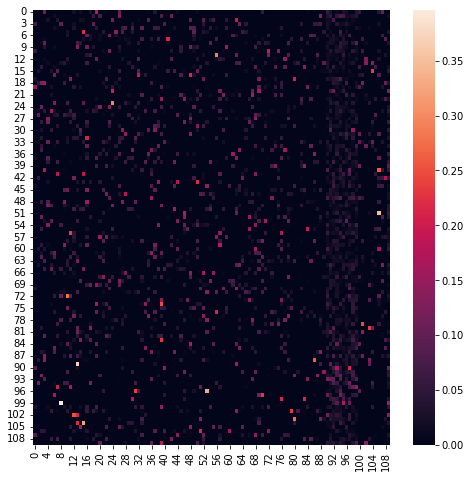

In [59]:
plt.figure( figsize = (8,8))
sns.heatmap( clf.P )

In [65]:
# clf.decision_scores_

C:\Users\041686\Anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

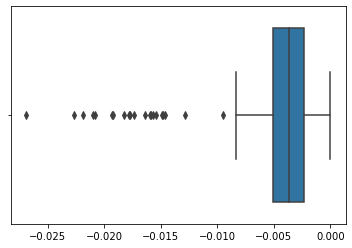

In [64]:
sns.boxplot( clf.decision_scores_ )